In [1]:
import mne 
import pandas as pd 
import os 
import numpy as np 
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
file_names = glob.glob('Test/*')
dfs = []
for file_name in file_names:
    dfs.append(pd.read_csv(file_name, index_col=0))
raw_df = pd.concat(dfs)

In [3]:
raw_df.shape #(7864320, 9)
raw_df.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
5,79,FP1,0,1.740,a,S2 match,0,co2a0000364,0.000000
6,79,FP1,1,-0.214,a,S2 match,0,co2a0000364,0.003906
7,79,FP1,2,-0.702,a,S2 match,0,co2a0000364,0.007812
8,79,FP1,3,0.275,a,S2 match,0,co2a0000364,0.011719
9,79,FP1,4,2.716,a,S2 match,0,co2a0000364,0.015625


In [4]:
mapping = dict(
    AFZ = 'AFz',
    CPZ = 'CPz',
    CZ = 'Cz', 
    FCZ = 'FCz',
    FP1 = 'Fp1', 
    FP2 = 'Fp2',
    FPZ = 'Fpz',
    FZ = 'Fz',
    OZ = 'Oz',
    POZ = 'POz',
    PZ = 'Pz'
)

def df_to_raw(df):
    chan, data = [], []
    for group_name , group_data in df.groupby(['sensor position']):
        chan.append(group_name)
        data.append(group_data['sensor value'].values)
    x = np.concatenate(data, axis=0).reshape(-1, 256)
    info = mne.create_info(
        ch_names = chan,
        ch_types= ['eeg']*64,
        sfreq = 256
    )
    mne.rename_channels(info, mapping)
    return mne.io.RawArray(x, info)


In [5]:
raw_eegs = [df_to_raw(df) for df in dfs]

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


In [6]:
raw = raw_eegs[0]

## Working with sensor locations

https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html

In [7]:
builtin_montages = mne.channels.get_builtin_montages(descriptions = True)

In [8]:
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [9]:
#I get biosemi64
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
print(standard_1020_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


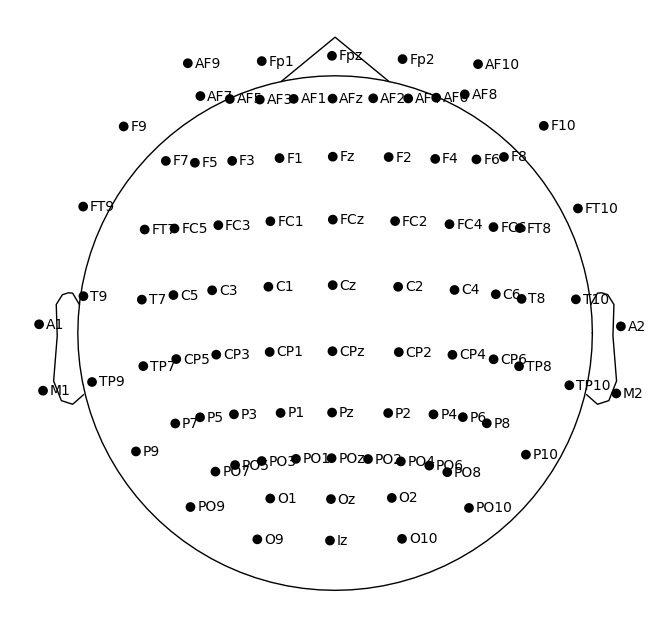

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


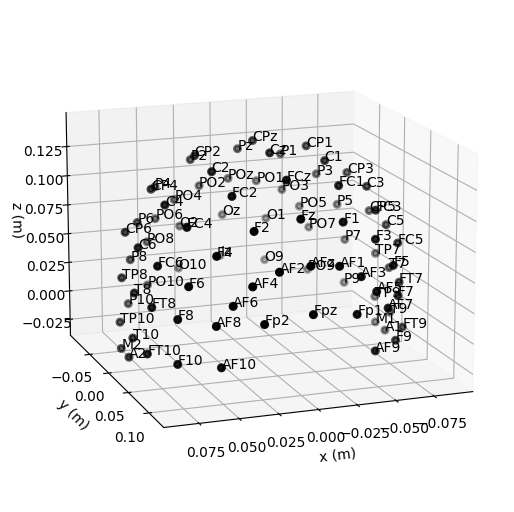

In [10]:
standard_1020_montage.plot() # 2d
fig = standard_1020_montage.plot(kind='3d', show=False)
fig = fig.gca().view_init(azim=70, elev=15) #set view angle

In [11]:
raw.drop_channels(['X', 'Y', 'nd'])
raw.set_montage(standard_1020_montage)

<RawArray | 61 x 256 (1.0 s), ~209 kB, data loaded>

## Displaying raw signal as an image

In [12]:
raw.describe()

<RawArray | 61 x 256 (1.0 s), ~209 kB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  AF1   EEG   µV    -20315000.00  -4201000.00  -783000.00  4100000.00  11912000.00
 1  AF2   EEG   µV    -14231000.00  -4099250.00  -559000.00  3835000.00  16042000.00
 2  AF7   EEG   µV    -20569000.00  -7996000.00  -2746500.00  2014000.00  18982000.00
 3  AF8   EEG   µV    -28951000.00  -8565000.00  -2096000.00  3764000.00  25248000.00
 4  AFz   EEG   µV    -15757000.00  -3062000.00  -621000.00  4262000.00  12075000.00
 5  C1    EEG   µV    -4771000.00  -1475000.00  -865000.00  112000.00  4018000.00
 6  C2    EEG   µV    -3855000.00  -1414000.00  -437000.00  1027000.00  4445000.00
 7  C3    EEG   µV    -6673000.00  -2767000.00  -1302000.00  163000.00  5046000.00
 8  C4    EEG   µV    -9288000.00  -4405000.00  -2452000.00  -498000.00  7802000.00
 9  C5    EEG   µV    -9542000.00  -4171000.00  -2706000.00  -753000.00  7060000.00
10  C6    EEG   µV    -127360

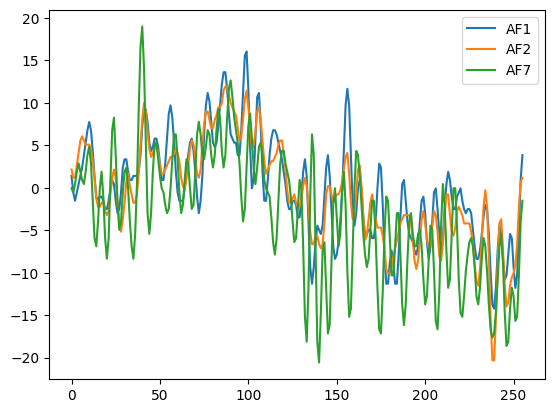

In [13]:
plt.plot(np.arange(256), raw.get_data(picks=['AF1', 'AF2', 'AF7'])[1])
plt.plot(np.arange(256), raw.get_data(picks=['AF1', 'AF2', 'AF7'])[0])
plt.plot(np.arange(256), raw.get_data(picks=['AF1', 'AF2', 'AF7'])[2])
plt.legend(['AF1', 'AF2', 'AF7'])

Plot freqs

PSD = 

Effective window size : 1.000 (s)


/home/francois/miniconda3/envs/datascience/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


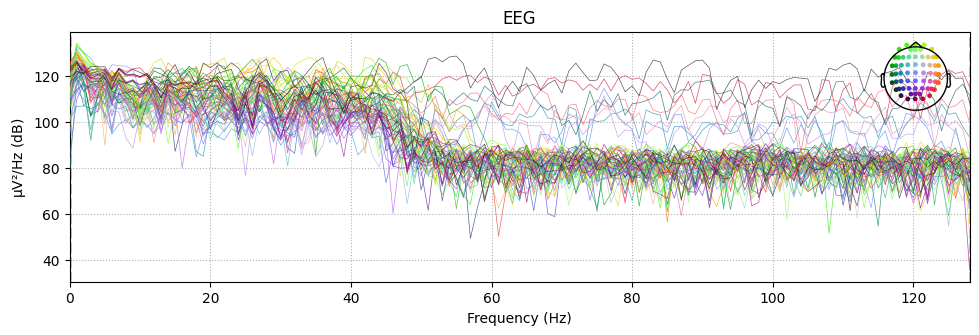

In [17]:
raw.compute_psd().plot()

## Apply filter

Effective window size : 1.000 (s)


/tmp/ipykernel_5363/2420717476.py:1: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(8,30, verbose=False)
/home/francois/miniconda3/envs/datascience/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


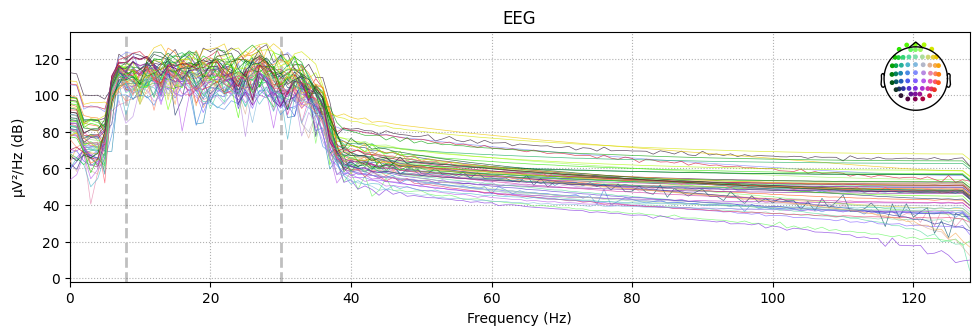

In [18]:
raw_filtered = raw.copy().filter(8,30, verbose=False)
raw_filtered.compute_psd().plot()

### Apply filter

In [16]:
raw_filtered = raw.copy().filter(8,30, verbose=False)

/tmp/ipykernel_5363/2123850664.py:1: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(8,30, verbose=False)


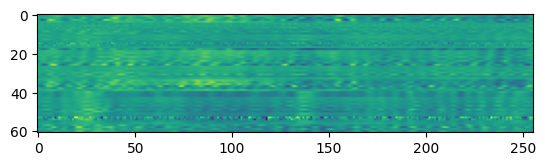

In [21]:
plt.imshow(raw.get_data())
plt.show()

/tmp/ipykernel_5363/934866889.py:1: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.imshow(raw.copy().filter(1,10, verbose=False).get_data())


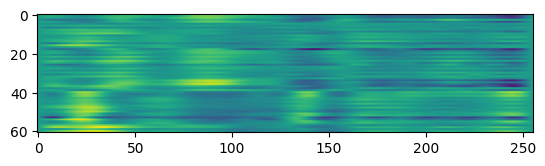

In [23]:
plt.imshow(raw.copy().filter(1,10, verbose=False).get_data())
plt.show()

/tmp/ipykernel_5363/1515560787.py:2: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])


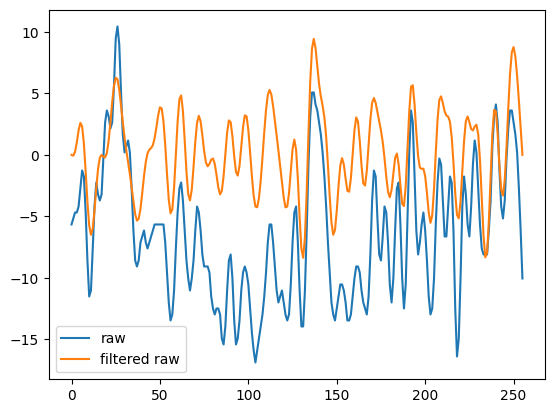

In [29]:
plt.plot(raw.copy().get_data()[40])
plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])
plt.legend(["raw", "filtered raw"])
plt.show()

## Independent component analysis 

In [30]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw.copy().filter(1, None, verbose=False), verbose=False)

/tmp/ipykernel_5363/2290330526.py:2: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(raw.copy().filter(1, None, verbose=False), verbose=False)
/home/francois/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit,1000 iterations on raw data (256 samples)
ICA components,20
Available PCA components,61
Channel types,eeg
ICA components marked for exclusion,—


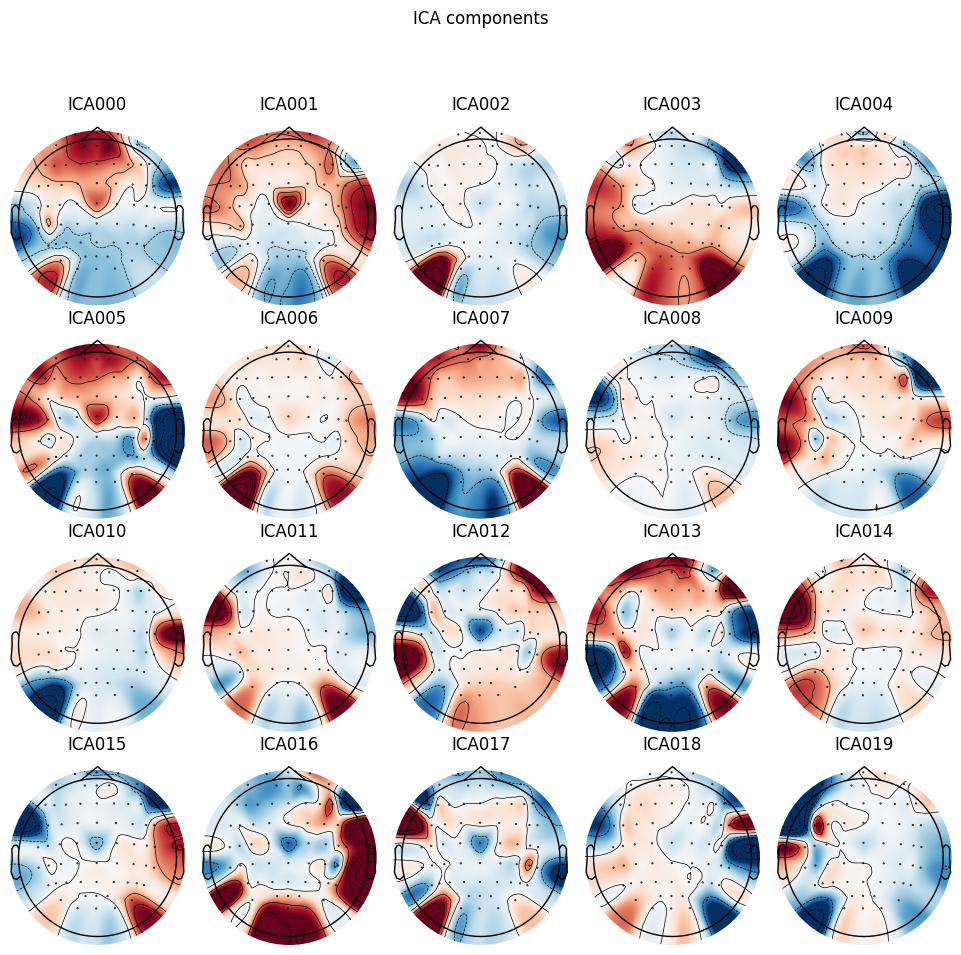

[<MNEFigure size 975x967 with 20 Axes>]

In [31]:
ica.plot_components()

## Plot a topographic map as an image

In [35]:
channel_list_fixed = raw.ch_names
def plot_eeg_topomap_animation(signal_array, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    montage =  mne.channels.make_standard_montage("standard_1020")
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)

    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)

    evoked.set_montage(montage)
    evoked.plot_topomap(np.arange(start_time, end_time, step_size),ch_type='eeg', time_unit='s', ncols=5, nrows=2, show_names=show_names)

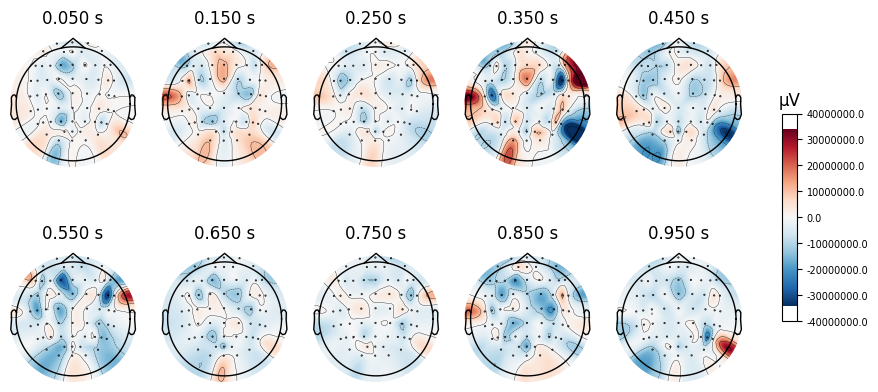

In [36]:
signal_array = raw.get_data()
plot_eeg_topomap_animation(signal_array)

## Plot a topographic map as an animation

In [37]:
def plot_eeg_topomap_animation(signal_array, save_path_animation, start_time=0.00, end_time=1, step_size=0.01, frame_rate=10):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)
    
    # (optional) plot and save animation
    if save_path_animation:
        fig, anim = evoked.animate_topomap(times=np.arange(start_time, end_time, step_size), frame_rate=frame_rate, butterfly=True, blit=False, );
        anim.save(save_path_animation);
        print('saved to', save_path_animation)

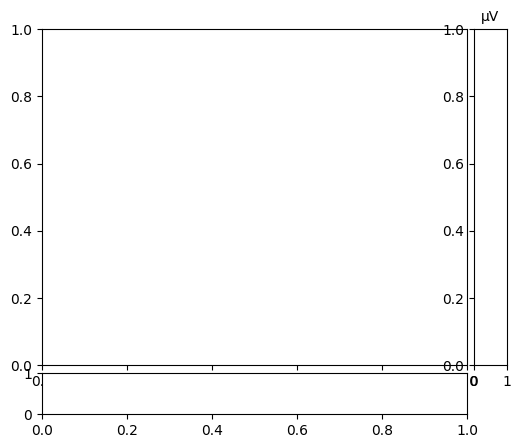

MovieWriter ffmpeg unavailable; using Pillow instead.


Initializing animation...
saved to ./gif.gif


In [38]:
plot_eeg_topomap_animation(signal_array, './gif.gif')

No projector specified for this dataset. Please consider the method self.add_proj.


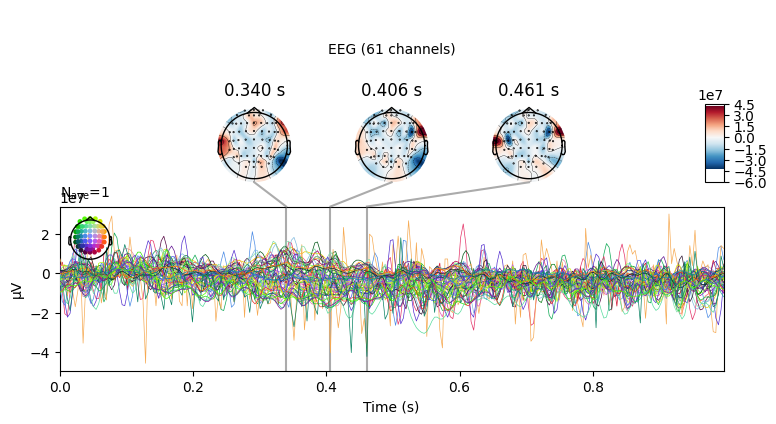

In [39]:
def plot_eeg_joint_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list_fixed:
        if ch not in list(set(montage.ch_names).intersection(channel_list_fixed)):
            ch_to_remove.append(channel_list_fixed.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list_fixed)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)

    # plot img
    evoked.plot_joint();
    
plot_eeg_joint_topomap(signal_array)